# DERBi PIE Semantics Module

In [1]:
# installing modules below:

In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install gutenbergpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install wheel

Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install cltk

Note: you may need to restart the kernel to use updated packages.


In [12]:
#importing modules below:

In [146]:
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-100')

In [145]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gpwal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [131]:
from nltk.tokenize import sent_tokenize, RegexpTokenizer

In [132]:
import nltk
from nltk.corpus import stopwords

In [133]:
from pprint import pprint

In [134]:
import numpy as np

In [135]:
from scipy import spatial

In [136]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter

In [137]:
import gutenbergpy.textget

In [138]:
import matplotlib.pyplot as plt

In [139]:
from tabulate import tabulate

In [140]:
from sklearn.manifold import TSNE

In [141]:
import plotly.express as px

In [142]:
import os

In [143]:
from cltk import NLP

In [144]:
# creating a directory path to make running code on other computers easier
directory_path = os.path.join(os.environ['USERPROFILE'],'derbipie-semantics','texts')
print(directory_path)

C:\Users\gpwal\derbipie-semantics\texts


In [29]:
# creating plots and arrays for the languages below:

## English

In [30]:
# creating a list of the Swadesh words
swadesh =  ['i', 'you', 'we', 'this', 'that', 'who', 'what', 'not', 'all', 'many', 'one', 'two', 'big', 'long', 'small', 'woman', 'man', 'person', 'fish', 'bird', 'dog', 'louse', 'tree', 'seed', 'leaf', 'root', 'bark', 'skin', 'flesh', 'blood', 'bone', 'grease', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'claw', 'foot', 'knee', 'hand', 'belly', 'neck', 'breasts', 'heart', 'liver', 'drink', 'eat', 'bite', 'see', 'hear', 'know', 'sleep', 'die', 'kill', 'swim', 'fly', 'walk', 'come', 'lie', 'sit', 'stand', 'give', 'say', 'sun', 'moon', 'star', 'water', 'rain', 'stone', 'sand', 'earth', 'cloud', 'smoke', 'fire', 'ashes', 'burn', 'path', 'mountain', 'red', 'green', 'yellow', 'white', 'black', 'night', 'hot', 'cold', 'full', 'new', 'good', 'round', 'dry', 'name']

In [31]:
# creating an empty dictionary
en_vectors = ({})
# for every word in the Swadesh list, get its vector and put them in the dictionary
for key in swadesh:
    en_vectors[key] = wv.get_vector(key)

In [32]:
# put the dictionary into a text file by converting it into a string
with open(f"{directory_path}/en_vectors.txt", "w") as f:
    f.write(str(en_vectors))

In [33]:
english_matrix = wv.get_normed_vectors()

In [34]:
tsne = TSNE(n_components=2, perplexity = 5)
english_projections = tsne.fit_transform(english_matrix)

In [35]:
english_vocab = wv.index_to_key

In [36]:
fig = px.scatter(
    english_projections, 
    x=0, y=1,
    hover_name = np.array(english_vocab),
    width=800, 
    height=800
)
fig.show()

## Latin

In [99]:
with open (f"{directory_path}/latintexts/latin_corpus.txt", 'r', encoding="ISO-8859-1") as f:
  text = f.read()
  
text = text.replace("\n", " ").lower()
sentences = sent_tokenize(text)
sent_word = [RegexpTokenizer(r"\w+").tokenize(sent) for sent in sentences]
latin_corpus = [[w for w in sent] for sent in sent_word]

In [100]:
la_model = Word2Vec(sentences = latin_corpus, 
                 vector_size = 100, 
                 window = 100,
                 epochs = 100)

In [39]:
latin_matrix = la_model.wv.get_normed_vectors()

In [40]:
tsne = TSNE(n_components=2, perplexity = 5)
latin_projections = tsne.fit_transform(latin_matrix)

In [41]:
latin_vocab = la_model.wv.index_to_key

In [97]:
latin_swadesh = ['ego', 'tu', 'nos', 'cis', 'istud', 'non', 'multi', 'duo', 'magnus', 'longus', 'minutus', 'femina', 'piscis', 'avis', 'canis', 'dryas', 'folium', 'radix', 'membrana', 'os', 'medulla', 'ovum', 'cornu', 'pilus', 'caput', 'auris', 'oculus', 'nasus', 'os', 'gemma', 'lingua', 'unguis', 'pes', 'genu', 'manus', 'uterus', 'monile', 'cor', 'iecur', 'bibere', 'edere', 'mordeo', 'cautio', 'cautio', 'cognoscere', 'somnus', 'funus', 'caedo', 'volare', 'pontis', 'venire', 'lectus', 'sedere', 'stare', 'dare', 'inquam', 'sol', 'mensis', 'stella', 'aqua', 'pluvia', 'lapis', 'nimbus', 'ignis', 'ardere', 'ardere', 'pontis', 'mons', 'gramen', 'albus', 'ater', 'nox', 'calidus', 'gelu', 'plenus', 'novus', 'siccus', 'nomen']

In [101]:
# creating an empty dictionary
la_vectors = ({})
# for every word in the Swadesh list, get its vector and put them in the dictionary
for key in latin_swadesh:
    la_vectors[key] = la_model.wv.get_vector(key)

In [102]:
with open(f"{directory_path}/la_vectors.txt", "w") as f:
    f.write(str(la_vectors))

In [47]:
fig = px.scatter(
    latin_projections, 
    x=0, y=1,
    hover_name = np.array(latin_vocab),
    width=800, 
    height=800
)
fig.show()

## Old English

In [154]:
with open (r"C:\Users\gpwal\cltk_data\ang\model\ang_models_cltk\texts\oe\oe_all.txt", 'r', encoding='utf-8') as f:
  text = f.read()
  
text = text.replace("\n", " ").lower()
sentences = sent_tokenize(text)
sent_word = [RegexpTokenizer(r"\w+").tokenize(sent) for sent in sentences]
oe_corpus = [[w for w in sent] for sent in sent_word]

In [156]:
oe_model = Word2Vec(sentences = oe_corpus, 
                 vector_size = 100, 
                 window = 100,
                 epochs = 100)

In [157]:
oe_matrix = oe_model.wv.get_normed_vectors()

In [158]:
tsne = TSNE(n_components=2, perplexity = 5)
oe_projections = tsne.fit_transform(oe_matrix)

In [159]:
oe_vocab = oe_model.wv.index_to_key

In [160]:
oe_swadesh = ['ic', 'ðu', 'us', 'he', 'ðæt', 'ne', 'manig', 'twegen', 'magister', 'lang', 'min', 'cwen', 'mann', 'mann', 'fisc', 'hund', 'lus', 'treow', 'blæd', 'rot', 'smeru', 'æg', 'horn', 'pluccian', 'heafod', 'eare', 'eage', 'nosu', 'ora', 'camb', 'tunge', 'nægel', 'fot', 'cneow', 'mund', 'manu', 'heorte', 'lifer', 'beor', 'etan', 'bitan', 'hieran', 'hieran', 'cnawan', 'swefan', 'dead', 'swimman', 'fleogan', 'findan', 'cuman', 'licgan', 'sittan', 'standan', 'sæcgan', 'sunne', 'mona', 'steorra', 'ea', 'regn', 'stan', 'eorþe', 'neowol', 'smoca', 'æsce', 'ælan', 'findan', 'beorg', 'read', 'grene', 'blaw', 'ælf', 'niht', 'wearm', 'cieldu', 'fulla', 'niwe', 'betra', 'sear', 'nama']

In [165]:
# creating an empty dictionary
oe_vectors = ({})
#for every word in the Swadesh list, get its vector and put them in the dictionary
for key in oe_swadesh:
    if key in (r"C:\Users\gpwal\cltk_data\ang\model\ang_models_cltk\texts\oe\oe_all.txt"):
        oe_vectors[key] = oe_model.wv.get_vector(key)
    else:
        pass

In [166]:
with open(f"{directory_path}/oe_vectors.txt", "w") as f:
    f.write(str(oe_vectors))

In [167]:
print(oe_vectors)

{}


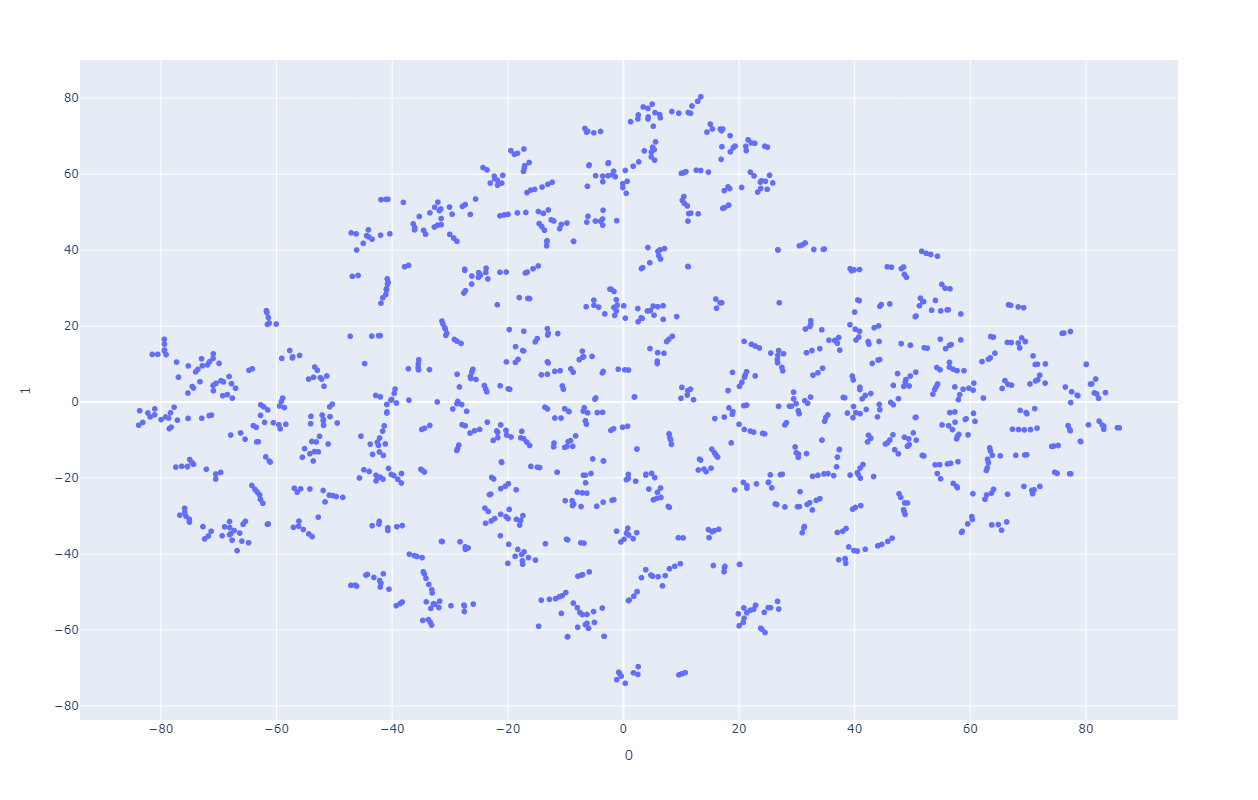

In [164]:
fig = px.scatter(
    oe_projections, 
    x=0, y=1,
    hover_name = np.array(oe_vocab),
    width=800, 
    height=800
)
fig.show()

## Sanskrit

In [147]:
with open (r"C:\Users\gpwal\cltk_data\san\text\sanskrit_text_sacred_texts\latin\sanskritcorpus.txt", 'r', encoding = 'utf-8') as f:
  text = f.read()
  
text = text.replace("\n", " ").lower()
sentences = sent_tokenize(text)
sent_word = [RegexpTokenizer(r"\w+").tokenize(sent) for sent in sentences]
ss_corpus = [[w for w in sent] for sent in sent_word]

In [148]:
ss_model = Word2Vec(sentences = ss_corpus, 
                 vector_size = 100, 
                 window = 100,
                 epochs = 100)

In [149]:
ss_matrix = ss_model.wv.get_normed_vectors()

In [150]:
tsne = TSNE(n_components=2, perplexity = 5)
ss_projections = tsne.fit_transform(ss_matrix)

In [151]:
ss_vocab = ss_model.wv.index_to_key

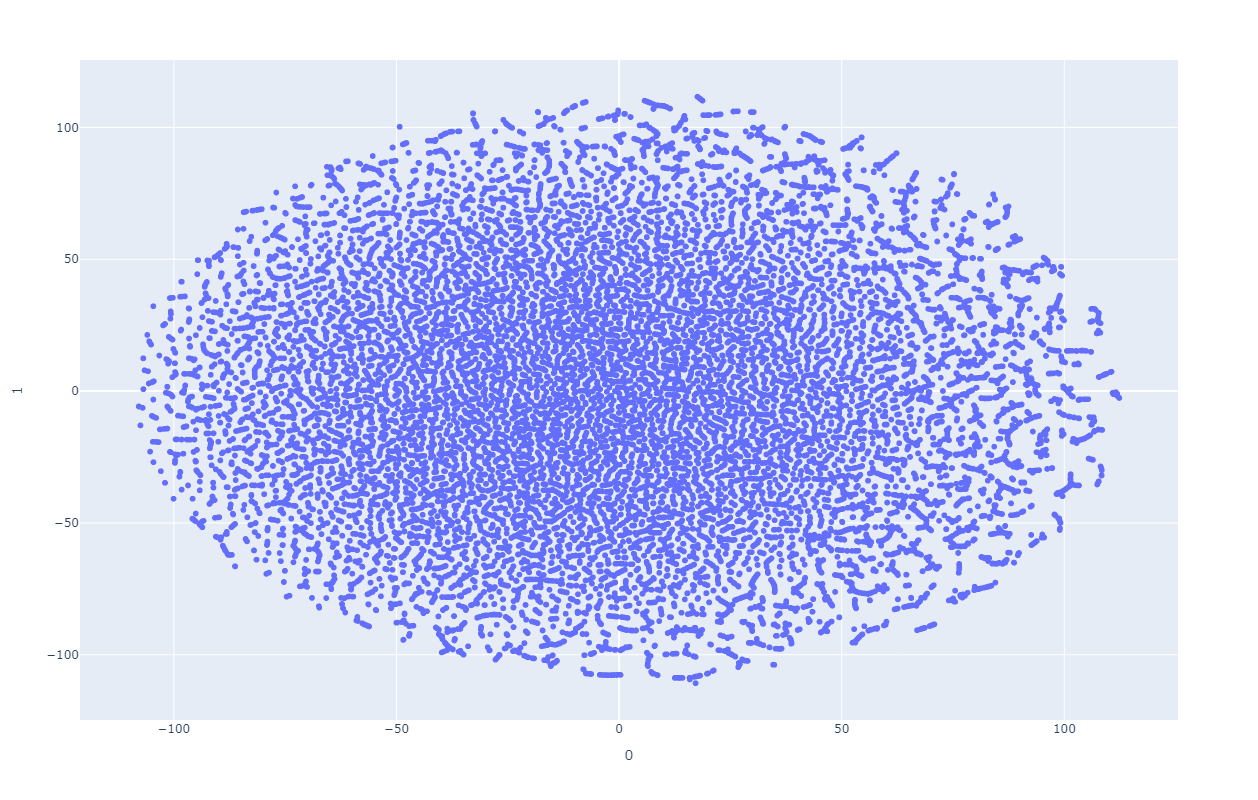

In [152]:
fig = px.scatter(
    ss_projections, 
    x=0, y=1,
    hover_name = np.array(ss_vocab),
    width=800, 
    height=800
)
fig.show()

## CLTK Latin

### Test Demonstration:

In [58]:
# getting Latin text
!curl -O -L https://gist.github.com/kylepjohnson/2f9376fcf15699c250a0d09b37683370/raw/05b7a17af4b216a4986d897c57a9987e836cc91a/lat-livy.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  899k  100  899k    0     0   655k      0  0:00:01  0:00:01 --:--:-- 1331k


In [59]:
# read the Latin file
with open("lat-livy.txt") as fo:
    livy_full = fo.read()

In [60]:
print("Text snippet:", livy_full[:200])
print("Character count:", len(livy_full))
print("Approximate token count:", len(livy_full.split()))

Text snippet: Iam primum omnium satis constat Troia capta in ceteros saevitum esse Troianos, duobus, Aeneae Antenorique, et vetusti iure hospitii et quia pacis reddendaeque Helenae semper auctores fuerant, omne ius
Character count: 921462
Approximate token count: 129799


In [61]:
len(livy_full) // 12

76788

In [62]:
# Now let's cut this down to roughly 10k tokens for this demonstration's purposes
livy = livy_full[:len(livy_full) // 12]
print("Approximate token count:", len(livy.split()))

Approximate token count: 10905


In [63]:
# Load the default Pipeline for Latin
cltk_nlp = NLP(language="lat")

‎𐤀 CLTK version '1.1.6'.
Pipeline for language 'Latin' (ISO: 'lat'): `LatinNormalizeProcess`, `LatinStanzaProcess`, `LatinEmbeddingsProcess`, `StopsProcess`, `LatinLexiconProcess`.


In [64]:
# Removing ``LatinLexiconProcess`` for this demo b/c it is slow (adds ~9 mins total)
cltk_nlp.pipeline.processes.pop(-1)
print(cltk_nlp.pipeline.processes)

[<class 'cltk.alphabet.processes.LatinNormalizeProcess'>, <class 'cltk.dependency.processes.LatinStanzaProcess'>, <class 'cltk.embeddings.processes.LatinEmbeddingsProcess'>, <class 'cltk.stops.processes.StopsProcess'>]


In [65]:
# Now execute NLP algorithms upon input text
# Aside from download, execution time is ~50 sec on a 2015 Macbook Pro
%time cltk_doc = cltk_nlp.analyze(text=livy)

# You will be asked to download some models (from CLTK, fastText, and Stanza)

CPU times: total: 1min 17s
Wall time: 45.7 s


In [66]:
# We can now inspect the result
print(type(cltk_doc))

<class 'cltk.core.data_types.Doc'>


In [67]:
# All accessors
print([x for x in dir(cltk_doc) if not x.startswith("__")])

['_get_words_attribute', 'embeddings', 'embeddings_model', 'language', 'lemmata', 'morphosyntactic_features', 'normalized_text', 'pipeline', 'pos', 'raw', 'sentence_embeddings', 'sentences', 'sentences_strings', 'sentences_tokens', 'stanza_doc', 'stems', 'tokens', 'tokens_stops_filtered', 'words']


In [68]:
# Several of the more useful
# List of tokens
print(cltk_doc.tokens[:20])

['Iam', 'primum', 'omnium', 'satis', 'constat', 'Troia', 'capta', 'in', 'ceteros', 'saevitum', 'esse', 'Troianos', ',', 'duobus', ',', 'Aeneae', 'Antenorique', ',', 'et', 'vetusti']


In [69]:
# List of lemmas
print(cltk_doc.lemmata[:20])

['Iam', 'primus', 'omnis', 'satis', 'consto', 'Troia', 'capio', 'in', 'ceterus', 'saevitum', 'sum', 'Troianos', ',', 'duo', ',', 'Aeneae', 'Antenorique', ',', 'et', 'vetusti']


In [70]:
# Basic part-of-speech info
print(cltk_doc.pos[:20])

['ADV', 'ADJ', 'PRON', 'ADV', 'VERB', 'NOUN', 'VERB', 'ADP', 'PRON', 'VERB', 'AUX', 'NOUN', 'PUNCT', 'NUM', 'PUNCT', 'NOUN', 'VERB', 'PUNCT', 'CCONJ', 'NOUN']


In [71]:
# A list of list of tokens
print(cltk_doc.sentences_tokens[:2])

[['Iam', 'primum', 'omnium', 'satis', 'constat', 'Troia', 'capta', 'in', 'ceteros', 'saevitum', 'esse', 'Troianos', ',', 'duobus', ',', 'Aeneae', 'Antenorique', ',', 'et', 'vetusti', 'iure', 'hospitii', 'et', 'quia', 'pacis', 'reddendaeque', 'Helenae', 'semper', 'auctores', 'fuerant', ',', 'omne', 'ius', 'belli', 'Achiuos', 'abstinuisse', ';'], ['casibus', 'deinde', 'variis', 'Antenorem', 'cum', 'multitudine', 'Enetum', ',', 'qui', 'seditione', 'ex', 'Paphlagonia', 'pulsi', 'et', 'sedes', 'et', 'ducem', 'rege', 'Pylaemene', 'ad', 'Troiam', 'amisso', 'quaerebant', ',', 'venisse', 'in', 'intimum', 'maris', 'Hadriatici', 'sinum', ',', 'Euganeisque', 'qui', 'inter', 'mare', 'Alpesque', 'incolebant', 'pulsis', 'Enetos', 'Troianosque', 'eas', 'tenuisse', 'terras', '.']]


In [72]:
# One ``Word`` object for each token
print(len(cltk_doc.words))

12541


In [73]:
# Let's look at a non-trivial sentence from Book 1
print("Original:", cltk_doc.sentences_strings[5])
print("")
print("Translation:", "Landing there, the Trojans, as men who, after their all but immeasurable wanderings, had nothing left but their swords and ships, were driving booty from the fields, when King Latinus and the Aborigines, who then occupied that country, rushed down from their city and their fields to repel with arms the violence of the invaders.")
# source: http://www.perseus.tufts.edu/hopper/text?doc=Liv.+1+1+5&fromdoc=Perseus%3Atext%3A1999.02.0151
sentence_6 = cltk_doc.sentences[5]  # type: List[Word]

Original: Ibi egressi Troiani , ut quibus ab immenso prope errore nihil praeter arma et naues superesset , cum praedam ex agris agerent , Latinus rex Aboriginesque qui tum ea tenebant loca ad arcendam vim advenarum armati ex urbe atque agris concurrunt .

Translation: Landing there, the Trojans, as men who, after their all but immeasurable wanderings, had nothing left but their swords and ships, were driving booty from the fields, when King Latinus and the Aborigines, who then occupied that country, rushed down from their city and their fields to repel with arms the violence of the invaders.


In [74]:
# Looking at one Word, 'concurrunt' ('they run together')
a_word_concurrunt = sentence_6[40]
print(a_word_concurrunt)

Word(index_char_start=None, index_char_stop=None, index_token=40, index_sentence=5, string='concurrunt', pos=verb, lemma='concurro', stem=None, scansion=None, xpos='L3|modA|tem1|gen9', upos='VERB', dependency_relation='advcl', governor=29, features={Aspect: [imperfective], Mood: [indicative], Number: [plural], Person: [third], Tense: [present], VerbForm: [finite], Voice: [active]}, category={F: [neg], N: [neg], V: [pos]}, stop=False, named_entity=None, syllables=None, phonetic_transcription=None, definition=None)


In [75]:
print("Word.string:", a_word_concurrunt.string)
# Part-of-speech is always available at `.pos`.
print("Word.pos:", a_word_concurrunt.pos)
print("Word.lemma:", a_word_concurrunt.lemma)

Word.string: concurrunt
Word.pos: verb
Word.lemma: concurro


In [76]:
# type
print("type(`Word.features`):", type(a_word_concurrunt.features))
print("")
#str repr of `MorphosyntacticFeatureBundle`
print("`Word.features`:", a_word_concurrunt.features)

type(`Word.features`): <class 'cltk.morphology.morphosyntax.MorphosyntacticFeatureBundle'>

`Word.features`: {Aspect: [imperfective], Mood: [indicative], Number: [plural], Person: [third], Tense: [present], VerbForm: [finite], Voice: [active]}


In [77]:
print("Mood:", a_word_concurrunt.features["Mood"])  # type: List[Mood]
print("Number:", a_word_concurrunt.features["Number"])  # type: List[Number]
print("Person:", a_word_concurrunt.features["Person"])  # type: List[Person]
print("Tense:", a_word_concurrunt.features["Tense"])  # type: List[Tense]
print("VerbForm:", a_word_concurrunt.features["VerbForm"])  # type: List[VerbForm]
print("Voice:", a_word_concurrunt.features["Voice"])  # type: List[Voice]

Mood: [indicative]
Number: [plural]
Person: [third]
Tense: [present]
VerbForm: [finite]
Voice: [active]


### NLP-ing our Latin Corpus

In [78]:
from cltk.data.fetch import FetchCorpus
corpus_downloader = FetchCorpus(language="lat")
corpus_downloader.list_corpora
corpus_downloader.import_corpus("lat_text_perseus")

In [24]:
with open(f"{directory_path}/latintexts/latin_corpus.txt", encoding='utf-8') as f:
    latin_full = f.read()

In [25]:
latin_part = latin_full[:len(latin_full) // 10]
print(len(latin_full))
print(len(latin_part))

27394534
2739453


In [117]:
from cltk.core.data_types import Process, Pipeline
from cltk.tokenizers import LatinTokenizationProcess
from cltk.lemmatize import LatinLemmatizationProcess
from cltk.languages.utils import get_lang

In [17]:
pipe = Pipeline(description="A custom Latin pipeline",     processes=[LatinTokenizationProcess, LatinLemmatizationProcess],     language=get_lang("lat"))

In [20]:
nlp = NLP(language='lat', custom_pipeline=pipe, suppress_banner=True)

In [21]:
latin_corpus = f"{directory_path}/latintexts/latin_corpus.txt"

In [26]:
cltk_latin = nlp(text=latin_part).lemmata
print(cltk_latin[30:40])

[':', 'David', 'Paniagua', 'Codifica', 'XML', ':', 'David', 'Paniagua', '2011', 'digilibLT']


In [27]:
with open(f"{directory_path}/latintexts/nlp_latin.txt", "w", encoding='utf-8') as f:
    f.write(str(cltk_latin))

In [88]:
pip install deep_translator

Note: you may need to restart the kernel to use updated packages.


In [5]:
from deep_translator import GoogleTranslator
from deep_translator import DeeplTranslator
from deep_translator import MyMemoryTranslator

In [5]:
x = f"{directory_path}/latintexts/latin_corpus.txt"

In [180]:
text_tokenized = []

In [182]:
with open(x, 'r', encoding = 'utf-8') as f:
    text=f.read()
    token = text.replace("\n", " ").lower()
    text_tokenized.append(nltk.tokenize.word_tokenize(text))

In [185]:
with open(f"{directory_path}/latintexts/text_tokenized.txt", 'w') as f:
    f.write(str(text_tokenized))

In [20]:
with open(x, 'r', encoding = 'utf-8') as a, open(f"{directory_path}/latintexts/latinwordbyline.txt", 'w', encoding = 'utf-8') as b:
    for line in a:
        for word in line.split():
            b.write(str(word) + '\n')

In [7]:
y = f"{directory_path}/latintexts/latinwordbyline.txt"

In [5]:
z = f"{directory_path}/latintexts/nlp_latin_translated.txt"

In [82]:
with open(f"{directory_path}/latintexts/text_tokenized.txt", 'r') as a, open(f"{directory_path}/latintexts/tokenizedwordbyline.txt", 'w', encoding='utf-8') as b:
                                                                                               for line in a:
                                                                                                   for word in line.split():
                                                                                                       b.write(str(word) + '\n')

In [83]:
with open(f"{directory_path}/latintexts/tokenizedwordbyline.txt", 'r', encoding='utf-8') as f:
    latin_lemmas = []
    for line in f.readlines():
        if line not in latin_lemmas:
            latin_lemmas.append(line)

In [85]:
with open(f"{directory_path}/latintexts/alllatinwords.txt", 'w', encoding='utf-8') as f:
    for key in latin_lemmas:
        f.write(str(key))

In [86]:
with open(f"{directory_path}/latintexts/alllatinwords.txt", 'r', encoding = 'utf-8') as f, open(z, 'w', encoding = 'utf-8') as g:
    for line in f.readlines():
        g.write(str(GoogleTranslator('latin', 'english').translate(line)) + "\n")

ConnectionError: HTTPSConnectionPool(host='translate.google.com', port=443): Max retries exceeded with url: /m?tl=en&sl=la&q=%27propinqui%27%2C (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000018E0CAEC160>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

## CLTK Old English

In [49]:
from cltk.data.fetch import FetchCorpus

In [50]:
oe_corpus_downloader = FetchCorpus(language="ang")

In [51]:
oe_corpus_downloader.list_corpora

['old_english_text_sacred_texts', 'ang_models_cltk']

In [87]:
oe_corpus_downloader.import_corpus('old_english_text_sacred_texts')

In [53]:
cltk_nlp_oe=NLP("ang")

‎𐤀 CLTK version '1.1.6'.
Pipeline for language 'Old English (ca. 450-1100)' (ISO: 'ang'): `MultilingualTokenizationProcess`, `OldEnglishLemmatizationProcess`, `OldEnglishEmbeddingsProcess`, `StopsProcess`.


In [78]:
oe_corpus_downloader.import_corpus('old_english_text_sacred_texts', r'C:\Users\gpwal\cltk_data\ang\html\old_english_text_sacred_texts')

In [88]:
with open(r'C:\Users\gpwal\cltk_data\ang\html\old_english_text_sacred_texts', encoding ='utf-8') as f:
    cltk_nlp_oe.analyze(text=f)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\gpwal\\cltk_data\\ang\\html\\old_english_text_sacred_texts'

In [82]:
with open(f"{directory_path}/oe_texts/cltk_oe_texts.txt", 'w', encoding='utf-8') as f:
    f.write(str(cltk_doc_oe))

## CLTK Sanskrit

In [105]:
ss_corpus_downloader =  FetchCorpus(language="san")

In [106]:
ss_corpus_downloader.list_corpora

['sanskrit_text_jnu',
 'sanskrit_text_dcs',
 'sanskrit_parallel_sacred_texts',
 'sanskrit_text_sacred_texts',
 'sanskrit_parallel_gitasupersite',
 'sanskrit_text_gitasupersite',
 'sanskrit_text_wikipedia',
 'sanskrit_text_sanskrit_documents',
 'san_models_cltk']

In [110]:
ss_corpus_downloader.import_corpus('sanskrit_text_sacred_texts')

In [108]:
cltk_nlp_ss=NLP("san")

‎𐤀 CLTK version '1.1.6'.
Pipeline for language 'Sanskrit' (ISO: 'san'): `MultilingualTokenizationProcess`, `SanskritEmbeddingsProcess`, `StopsProcess`.


In [114]:
with open(r"C:\Users\gpwal\cltk_data\san\text\sanskrit_text_sacred_texts\latin\sanskritcorpus.txt", 'r', encoding='utf-8') as f:
    sanskrit_full = f.read()

In [115]:
sanskrit_part = sanskrit_full[:len(sanskrit_full) // 10]
print(len(sanskrit_full))
print(len(sanskrit_part))

9036432
903643


In [120]:
from cltk.languages.pipelines import SanskritPipeline

In [121]:
ss_pipe = SanskritPipeline()

In [122]:
ss_nlp = NLP(language='san', custom_pipeline=ss_pipe, suppress_banner=True)

In [123]:
ss_corpus = r"C:\Users\gpwal\cltk_data\san\text\sanskrit_text_sacred_texts\latin\sanskritcorpus.txt"

In [126]:
cltk_ss = ss_nlp(text=sanskrit_part)

In [128]:
# this didn't seem to give what we wanted
with open(f"{directory_path}/ss_texts/nlp_ss.txt", "w", encoding='utf-8') as f:
    f.write(str(cltk_ss))

## Comparing Latin and English Vectors

In [145]:
with open(f"{directory_path}/la_en_compared.txt", 'w') as f:
    f.write("Latin Words: \n")
    for key in latin_swadesh:
        f.write(f"{key} \n")
        g = la_model.wv.most_similar(key)
        f.write(str(g))
        f.write("\n \n")
    f.write("\n \n English Words: \n")
    for key in swadesh:
        f.write(f"{key} \n")
        h = wv.most_similar(key)
        f.write(str(h))
        f.write("\n \n")